# 2019380415 김선엽 week03 고급비즈니스어낼리틱스 과제

## 실습

### 분석 라이브러리 불러오기

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


### 데이터 불러오기

In [9]:
data = pd.read_csv('./week03/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 데이터 묘사 관련 함수

In [4]:
data.info() # data의 타입, 카운트, null 여부 등을 확인
data.describe() # data의 요약 통계
data.shape # 데이터의 행, 열의 수를 (n, m)의 형태로 제공
data.columns # 데이터의 속성(열) 나열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

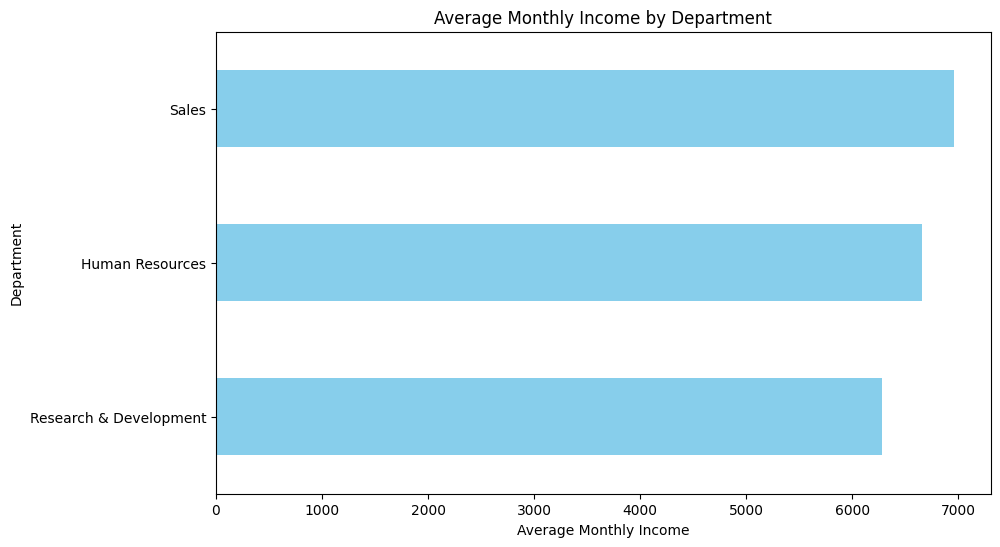

In [24]:
def plot_avg_income_by_department(df):
    plt.figure(figsize=(10, 6))
    avg_income_by_department = df.groupby('Department')['MonthlyIncome'].mean().sort_values()
    avg_income_by_department.plot(kind='barh', color='skyblue')
    plt.title('Average Monthly Income by Department')
    plt.xlabel('Average Monthly Income')
    plt.ylabel('Department')
    plt.show()

plot_avg_income_by_department(data)

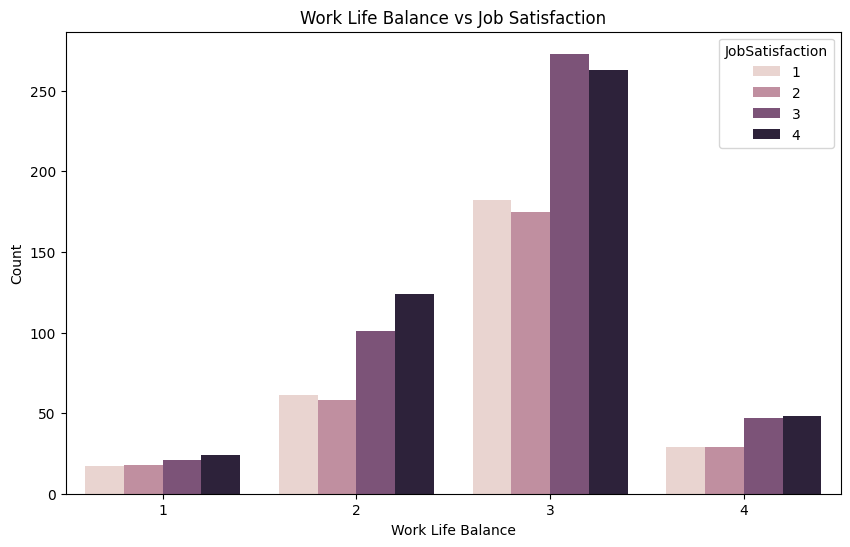

In [20]:
def plot_work_life_balance_vs_job_satisfaction(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='WorkLifeBalance', hue='JobSatisfaction', data=df)
    plt.title('Work Life Balance vs Job Satisfaction')
    plt.xlabel('Work Life Balance')
    plt.ylabel('Count')
    plt.show()
plot_work_life_balance_vs_job_satisfaction(data)

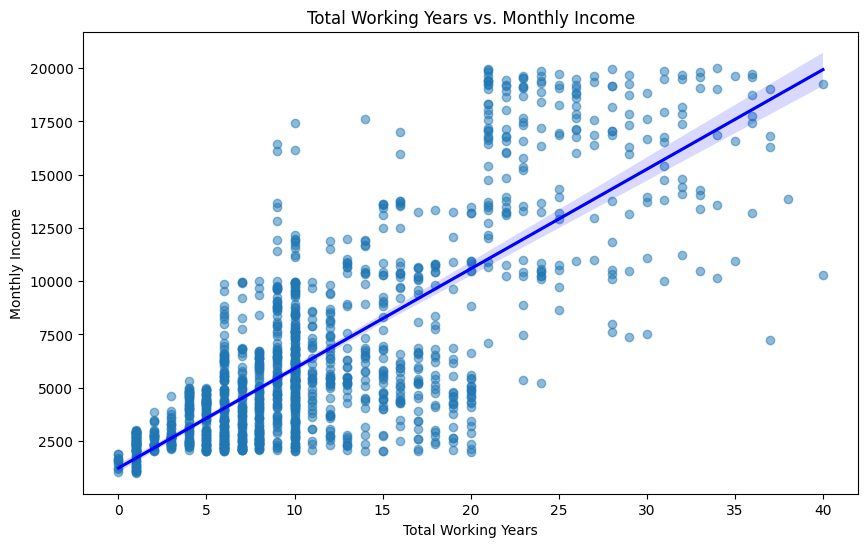

In [22]:
def plot_working_years_vs_income(df):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='TotalWorkingYears', y='MonthlyIncome', data=df, 
                scatter_kws={'alpha':0.5}, line_kws={"color":"blue"})
    plt.title('Total Working Years vs. Monthly Income')
    plt.xlabel('Total Working Years')
    plt.ylabel('Monthly Income')
    plt.show()

plot_working_years_vs_income(data)

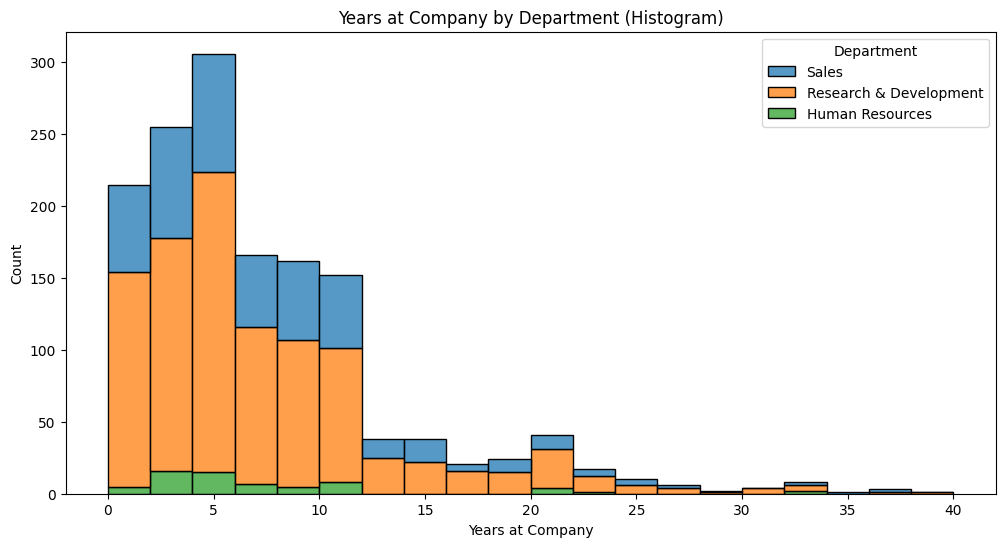

In [21]:
def plot_years_at_company_histogram(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='YearsAtCompany', hue='Department', 
                 multiple='stack', bins=20)
    plt.title('Years at Company by Department (Histogram)')
    plt.xlabel('Years at Company')
    plt.ylabel('Count')
    plt.show()
plot_years_at_company_histogram(data)